In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
butterfree = "https://github.com/vishal-pandey/Pokemon-Classification/raw/master/Butterfree.zip"
ditto = "https://github.com/vishal-pandey/Pokemon-Classification/raw/master/Ditto.zip"
pickachu1 = "https://github.com/vishal-pandey/Pokemon-Classification/raw/master/Pikachu1.zip"
pickachu2 = "https://github.com/vishal-pandey/Pokemon-Classification/raw/master/Pikachu2.zip"

In [0]:
!rm -r ./*

In [39]:
!wget $butterfree $ditto $pickachu1 $pickachu2

--2019-12-28 18:01:44--  https://github.com/vishal-pandey/Pokemon-Classification/raw/master/Butterfree.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vishal-pandey/Pokemon-Classification/master/Butterfree.zip [following]
--2019-12-28 18:01:44--  https://raw.githubusercontent.com/vishal-pandey/Pokemon-Classification/master/Butterfree.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6210212 (5.9M) [application/zip]
Saving to: ‘Butterfree.zip’

Butterfree.zip      100%[===================>]   5.92M  --.-KB/s    in 0.04s   

2019-12-28 18:01:45 (138 MB/s) - ‘Butterfree.zip’ saved [6210212/6210212

In [40]:
!unzip Butterfree.zip
!unzip Ditto.zip
!unzip Pikachu1.zip -d Pikachu
# !unzip Pikachu2.zip -d Pikachu

Archive:  Butterfree.zip
   creating: Butterfree/
  inflating: Butterfree/03ba358698324abba7c5f97bbd149e5e.jpg  
  inflating: Butterfree/0d6b68356f4a474c87b97d791f683309.jpg  
  inflating: Butterfree/0ef187bb8dcd445bb846e33e61ca87f6.jpg  
  inflating: Butterfree/11453f6d971246c99a703cea57261e67.jpg  
  inflating: Butterfree/1b09a7dc1b6b42aba17c4056ca073df0.jpg  
  inflating: Butterfree/216289a9ef5746d1bb4d7f843ef3345e.jpg  
  inflating: Butterfree/22995101397b4e059a03a274132fefb8.jpg  
  inflating: Butterfree/291efcf635664ffd8ad60e0b6670e9ed.jpg  
  inflating: Butterfree/294e9d9fd38b4508981dd3e7ca4e1e91.jpg  
  inflating: Butterfree/2cd25915fa56427b8c41275447f22598.jpg  
  inflating: Butterfree/2f96f3fe97964193802057bbe77efc87.jpg  
  inflating: Butterfree/31623268f2f848e5af07f8d7975194ba.jpg  
  inflating: Butterfree/31e8fdaca3d3460a86ecc35428535f83.jpg  
  inflating: Butterfree/352f0eb2f4a844558e2b487330299bc9.jpg  
  inflating: Butterfree/365f3d9018ad475c9ef49394e2619e6d.jpg  
  inf

In [0]:
p1 = "Butterfree"
p2 = "Ditto"
p3 = "Pikachu"
classes = [p1, p2, p3]

In [0]:
import os

In [0]:
# Matplotlib image for converting png to numpy array
import matplotlib.image as mpimg
from skimage import color

00000210.png
00000218.png
00000205.png


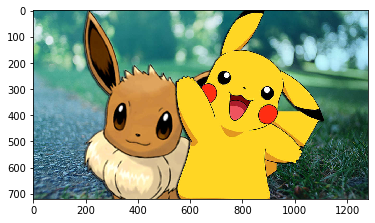

In [44]:
# To Delete The images which are not able to converted to numpy array

for i in os.scandir(p3):
  try:
    img = mpimg.imread(p3+"/"+i.name)
    plt.imshow(img)
  except Exception:
    print(i.name)
    to_delete = p3+"/"+i.name
    !rm $to_delete

In [0]:
X = []
y = []
for c in classes:
  for i in os.scandir(c):
    img = mpimg.imread(c+"/"+i.name)
    img = color.rgb2gray(img)
    newimg = []
    for i in range(0, img.shape[0], int(img.shape[0]/100)):
      aa = []
      for j in range(0, img.shape[1], int(img.shape[1]/100)):
        if len(aa) < 100:
          aa.append(img[i, j])
      if len(newimg) < 100:
        newimg.append(aa)
    
    X.append(np.array(newimg))
    y.append(c)


In [0]:
X = np.array(X)

In [0]:
y = np.array(y)

In [0]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(y.shape[0], 1)).toarray()

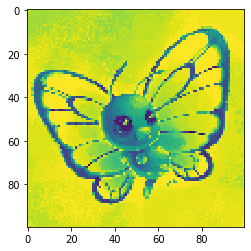

In [49]:
plt.imshow(X[21])

In [50]:
X.shape

(200, 100, 100)

In [0]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras.optimizers import SGD

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
200/200 [==============================] - 1s 4ms/step - loss: 1.5190 - acc: 0.5383
Epoch 2/20
200/200 [==============================] - 0s 375us/step - loss: 1.6106 - acc: 0.5883
Epoch 3/20
200/200 [==============================] - 0s 388us/step - loss: 0.8585 - acc: 0.5683
Epoch 4/20
200/200 [==============================] - 0s 385us/step - loss: 0.8538 - acc: 0.6233
Epoch 5/20
200/200 [==============================] - 0s 406us/step - loss: 0.8070 - acc: 0.6300
Epoch 6/20
200/200 [==============================] - 0s 417us/step - loss: 0.8190 - acc: 0.6183
Epoch 7/20
200/200 [==============================] - 0s 430us/step - loss: 0.9113 - acc: 0.5333
Epoch 8/20
200/200 [==============================] - 0s 378us/step - loss: 0.7140 - acc: 0.6633
Epoch 9/20
200/200 [==============================] - 0s 357us/step - loss: 0.7021 - acc: 0.6733
Epoch 10/20
200/200 [==============================] - 0s 357us/step - loss: 0.6904 - acc: 0.6717
Epoch 11/20
200/200 [==========

In [0]:
yhat = model.predict(X)

In [77]:
yhat[17]

array([1., 0., 0.], dtype=float32)

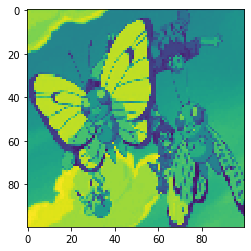

In [78]:
plt.imshow(X[0].reshape(100, 100))

In [79]:
yhat

array([[0.36584282, 0.48801276, 0.4289699 ],
       [0.3701263 , 0.46646413, 0.36131692],
       [0.366139  , 0.4872809 , 0.44103953],
       [0.3697517 , 0.4358003 , 0.20826   ],
       [0.36815965, 0.48662096, 0.43705007],
       [0.36762497, 0.48374996, 0.4341787 ],
       [0.36804515, 0.4834251 , 0.42594033],
       [0.3734829 , 0.4461202 , 0.2911099 ],
       [0.3665986 , 0.48718014, 0.43473405],
       [0.36488903, 0.48610157, 0.4260822 ],
       [0.38210148, 0.3731851 , 0.06950301],
       [0.37274563, 0.4405122 , 0.24839419],
       [0.36723477, 0.48415366, 0.42482328],
       [0.36675185, 0.4892924 , 0.44095248],
       [0.36789662, 0.47362423, 0.3542263 ],
       [0.3678515 , 0.48451152, 0.42277306],
       [0.36736232, 0.47865623, 0.38302553],
       [1.        , 0.        , 0.        ],
       [0.36901197, 0.48307413, 0.41383496],
       [0.37622842, 0.4275529 , 0.18597245],
       [0.38590312, 0.35380393, 0.0504505 ],
       [0.36556736, 0.4838731 , 0.40991634],
       [0.

In [0]:
from keras.layers import LSTM, Bidirectional
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D

from keras_self_attention import SeqSelfAttention

In [0]:
from keras import losses

In [82]:
!pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.42.0-cp36-none-any.whl size=17296 sha256=18e5ce96bcd68e9d74475cbe62de6c8451f85b203634e4d4398631973becbf0b
  Stored in directory: /root/.cache/pip/wheels/7b/05/a0/99c0cf60d383f0494e10eca2b238ea98faca9a1fe03cac2894
Successfully built keras-self-attention


In [83]:
X.shape

(200, 100, 100, 1)

In [0]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

In [86]:

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(100, 100)))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(LSTM(32))

model.add(Dense(50, activation='relu'))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [90]:

model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
200/200 [==============================] - 5s 25ms/step - loss: 0.2314 - acc: 0.3600
Epoch 2/20
200/200 [==============================] - 3s 14ms/step - loss: 0.2226 - acc: 0.3700
Epoch 3/20
200/200 [==============================] - 3s 14ms/step - loss: 0.2242 - acc: 0.3400
Epoch 4/20
200/200 [==============================] - 3s 14ms/step - loss: 0.2158 - acc: 0.4000
Epoch 5/20
200/200 [==============================] - 3s 14ms/step - loss: 0.2113 - acc: 0.4500
Epoch 6/20
200/200 [==============================] - 3s 14ms/step - loss: 0.2086 - acc: 0.4550
Epoch 7/20
200/200 [==============================] - 3s 14ms/step - loss: 0.2064 - acc: 0.4850
Epoch 8/20
200/200 [==============================] - 3s 14ms/step - loss: 0.2196 - acc: 0.3800
Epoch 9/20
200/200 [==============================] - 3s 14ms/step - loss: 0.2042 - acc: 0.5250
Epoch 10/20
200/200 [==============================] - 3s 15ms/step - loss: 0.2120 - acc: 0.4350
Epoch 11/20
200/200 [==================

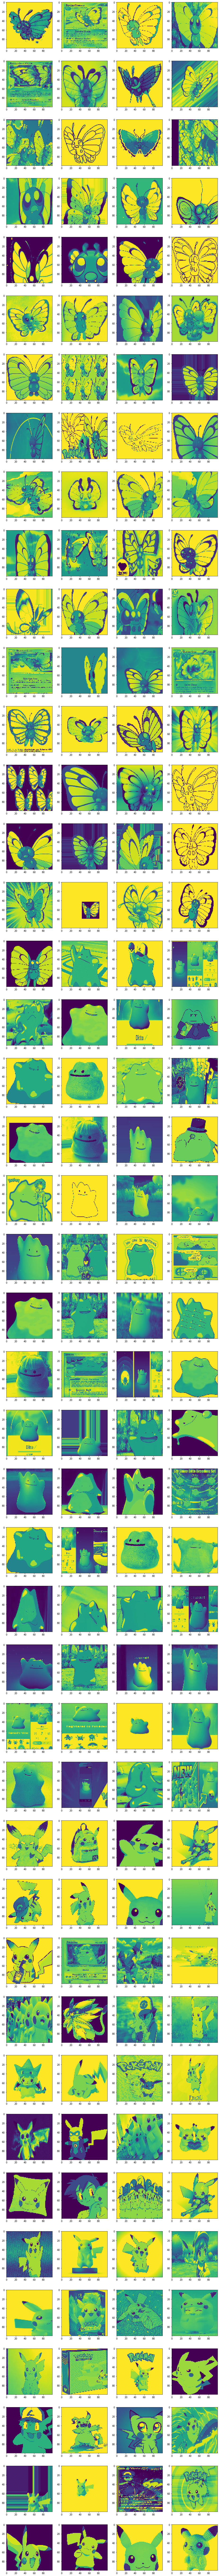

In [97]:
w=10
h=10
fig=plt.figure(figsize=(16,200))
columns = 4
rows = 44
for i in range(1, columns*rows +1):
    img = X[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [93]:
X.shape

(200, 100, 100)